<a href="https://colab.research.google.com/github/victoriamaina/Research-on-car-usage/blob/main/Hypothesis_Testing_of_car_usage_By_Victoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESEARCH QUESTION**

To determine between tuesday and thursday which of this days had most blue cars taken 





**METRIC OF SUCCESS**

Understanding the contenxt and be able to carry out experimental Design such as

Univariate Analysis

Bivariate Analysis

Create bar graphs, histo graphs, line, scatter plots, heatmaps correlations for the inorder to get insights

Identifying the z_score in to compare with the significant value

**Experimental Designs**

Find and ideal with outliers, anomalies, and missing data within the dataset. Identifying and comming up with your Hypothesis Observations and possible solutions based on findings

**IMPORTING LIBRARIES**

In [212]:
# Importing the libraries we will need 
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

#Importing matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Reading the Dataset from our CSV file





The dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)..



*   Dataset link for download or access: [Link](http://bit.ly/DSCoreAutolibDataset)





In [213]:
# Let's load the data from the excel file and create the dataframe to be used

df=pd.read_csv("/content/autolib_daily_events_postal_code.csv")

## 1.2 Previewing our Dataset


In [214]:
#Previewing the first ten rows of our data
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [215]:
#Previewing the last ten rows of our data
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## 1.3 Accessing Information about our Dataset

We might need to convert columns to the respective datatypes. This observation can be made by accessing information about the dataset.

In [216]:
# Getting to know more about the dataset by accessing its information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [217]:
#We get the shape of the dataset
df.shape

(16085, 13)

In [218]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [219]:
#The research requires that we use data based on the the day type, weekend or weekday. We will use weekdays
#We create a dataset with only weekday values
df = df.loc[df['day_type'] == 'weekday']
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [220]:
#Creating a copy of the dataset so that we can clean the data without affecting the main dataset
df1 = df.copy(deep = True)

## 1.4 Cleaning our Dataset

Let us perform data cleaning procedures below providing a documentation for our actions. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

### 1.) Validity <font color="green"></font>

In [221]:
##Separating with '-'
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [222]:
# Procedure 1:
# Data Cleaning Action: Dropping columns
# Explanation: We drop columns that are not relevant to the research we are doing.
#
df1 = df1.drop(['n_daily_data_points'], axis=1)
df1.head(5)

,Postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


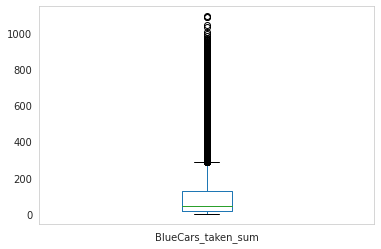

In [223]:
#Procedure 3:
#Data Cleaning Action: Outliers
#Explanation: There are existing outliers but they won;t be dropped as they are 
#true values to the data

df1.boxplot(column =["BlueCars_taken_sum"], grid = False)

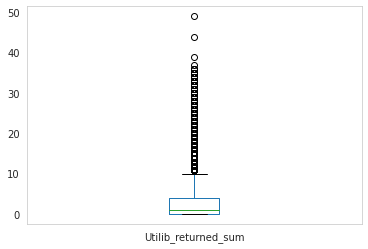

In [224]:
#Procedure 3:
#Data Cleaning Action: Outliers
#Explanation: There are existing outliers but they won;t be dropped as they are 
#true values to the data

df1.boxplot(column =["Utilib_returned_sum"], grid = False)

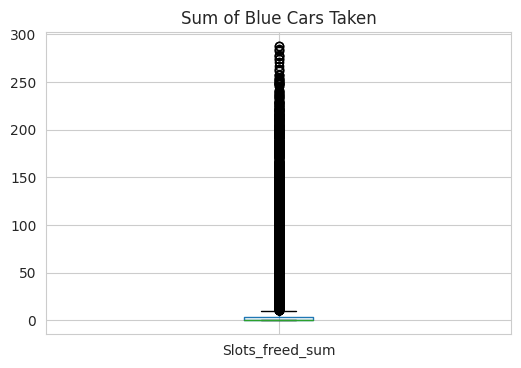

In [225]:
plt.figure(dpi=100)
df.boxplot(['Slots_freed_sum'])
plt.title('Sum of Blue Cars Taken')
plt.show()

#Outliers are kept as they are true values 

### 2.) Accuracy <font color="green"></font>

In [226]:
# Procedure 1:
# Data Cleaning Action: No action
# Explanation: There are no accuracy errors in the dataset

### 3.) Completeness

In [227]:
# Procedure 1:
# Data Cleaning Action: Checking for null values
# Explanation: Checking for any null values
df1.isnull().any()

Postal_code               False
date                      False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [228]:
#checking the sum of null values in descending order
df1.isnull().sum().sort_values(ascending=False)

Slots_taken_sum           0
Slots_freed_sum           0
Utilib_14_returned_sum    0
Utilib_14_taken_sum       0
Utilib_returned_sum       0
Utilib_taken_sum          0
BlueCars_returned_sum     0
BlueCars_taken_sum        0
day_type                  0
dayOfWeek                 0
date                      0
Postal_code               0
dtype: int64

In [229]:
#Dropping columns
# We  drop columns not related to blue cars
df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis = 1, inplace = True)

### There are no null values.

### 4.) Consitency

In [230]:
# Procedure 1:
# Data Cleaning Action: Checking for duplicates and dropping duplicates
# Explanation: Duplicate rows will bring inconsistent values in the dataset and they will have to be dropped.
#There are no duplicate values
df1.duplicated().sum()

0

### Exporting the Cleaned Dataset

In [231]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it

df1.to_csv('autolib_daily.csv')
autolib_daily = pd.read_csv('autolib_daily.csv', index_col=0)
autolib_daily.head(5)


,Postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


**bold text**## 1.5 EXPLORATORY DATA ANALYSIS

In [232]:
autolib_daily.describe()

,Postal_code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,1.417797,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,2.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,3.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,4.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [233]:
autolib_daily.dayOfWeek = autolib_daily.dayOfWeek.map({0:'monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
autolib_daily['dayOfWeek'].value_counts()


monday       2374
Tuesday      2363
Friday       2271
Thursday     2268
Wednesday    2268
Name: dayOfWeek, dtype: int64

Let's answer the following questions with our dataset

Measures of Central Tendency

In [234]:
# Example 7: Displaying the summary statistics of the dataframe
#
autolib_daily.describe()

,Postal_code,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
std,7647.995374,169.626905,168.344751,5.379950,5.349742,11.963164,11.882660,47.900208,47.848580
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,18.000000,19.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,42.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,126.000000,126.000000,4.000000,4.000000,9.000000,9.000000,4.000000,5.000000
max,95880.000000,1093.000000,1056.000000,47.000000,49.000000,94.000000,94.000000,288.000000,294.000000


In [235]:
autolib_daily["BlueCars_taken_sum"].median()

42.0

In [236]:
## standard deviation  of columns of the dataframe
autolib_daily.std(axis = 0)

Postal_code               7647.995374
BlueCars_taken_sum         169.626905
BlueCars_returned_sum      168.344751
Utilib_taken_sum             5.379950
Utilib_returned_sum          5.349742
Utilib_14_taken_sum         11.963164
Utilib_14_returned_sum      11.882660
Slots_freed_sum             47.900208
Slots_taken_sum             47.848580
dtype: float64

In [237]:
## Mean of columns of the dataframe
autolib_daily.mean(axis = 0)

Postal_code               88789.959286
BlueCars_taken_sum          116.028673
BlueCars_returned_sum       115.639380
Utilib_taken_sum              3.424983
Utilib_returned_sum           3.417620
Utilib_14_taken_sum           7.999047
Utilib_14_returned_sum        7.975485
Slots_freed_sum              20.945166
Slots_taken_sum              20.921431
dtype: float64

In [238]:
autolib_daily.var(axis = 0)

Postal_code               5.849183e+07
BlueCars_taken_sum        2.877329e+04
BlueCars_returned_sum     2.833996e+04
Utilib_taken_sum          2.894387e+01
Utilib_returned_sum       2.861974e+01
Utilib_14_taken_sum       1.431173e+02
Utilib_14_returned_sum    1.411976e+02
Slots_freed_sum           2.294430e+03
Slots_taken_sum           2.289487e+03
dtype: float64

In [239]:
## Meadian  of columns of the dataframe
autolib_daily.median(axis = 0)

Postal_code               92340.0
BlueCars_taken_sum           42.0
BlueCars_returned_sum        42.0
Utilib_taken_sum              1.0
Utilib_returned_sum           1.0
Utilib_14_taken_sum           3.0
Utilib_14_returned_sum        3.0
Slots_freed_sum               0.0
Slots_taken_sum               0.0
dtype: float64

In [240]:
## Kurtosis of the columns 
##
autolib_daily.kurt(axis = 0)

Postal_code              -0.543010
BlueCars_taken_sum        5.553808
BlueCars_returned_sum     5.542863
Utilib_taken_sum          7.368654
Utilib_returned_sum       7.347394
Utilib_14_taken_sum       7.089539
Utilib_14_returned_sum    7.123847
Slots_freed_sum           6.007230
Slots_taken_sum           6.001265
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


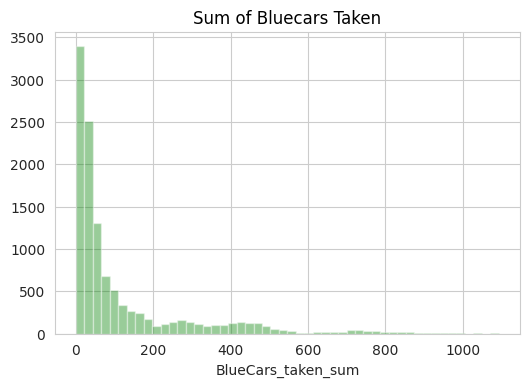

In [241]:
#We can represent the number of blue cars taken with a histogram
plt.figure(dpi = 100)
sns.distplot(df["BlueCars_taken_sum"], kde = False, color = 'green')
plt.title("Sum of Bluecars Taken", color = 'black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


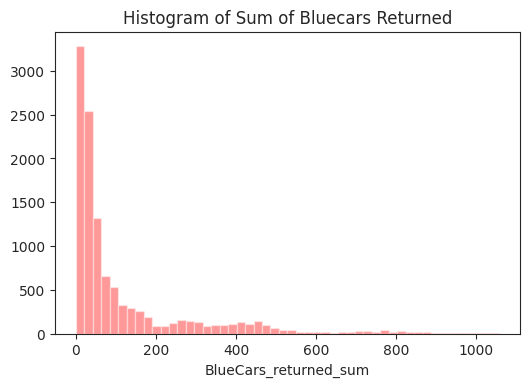

In [242]:
plt.figure(dpi = 100)
sns.set_style("ticks")
sns.distplot(df["BlueCars_returned_sum"], kde = False, color = 'red')
plt.title("Histogram of Sum of Bluecars Returned")
plt.show()

BIVARIATE ANALYSIS

No handles with labels found to put in legend.


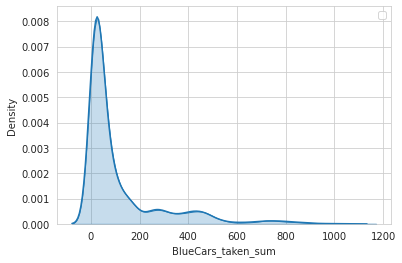

In [243]:
# plot of bluecars returned and bluecars taken
sns.set_style('whitegrid')
sns.kdeplot(autolib_daily.BlueCars_taken_sum, shade=True)
sns.kdeplot(autolib_daily.BlueCars_returned_sum)
plt.legend();

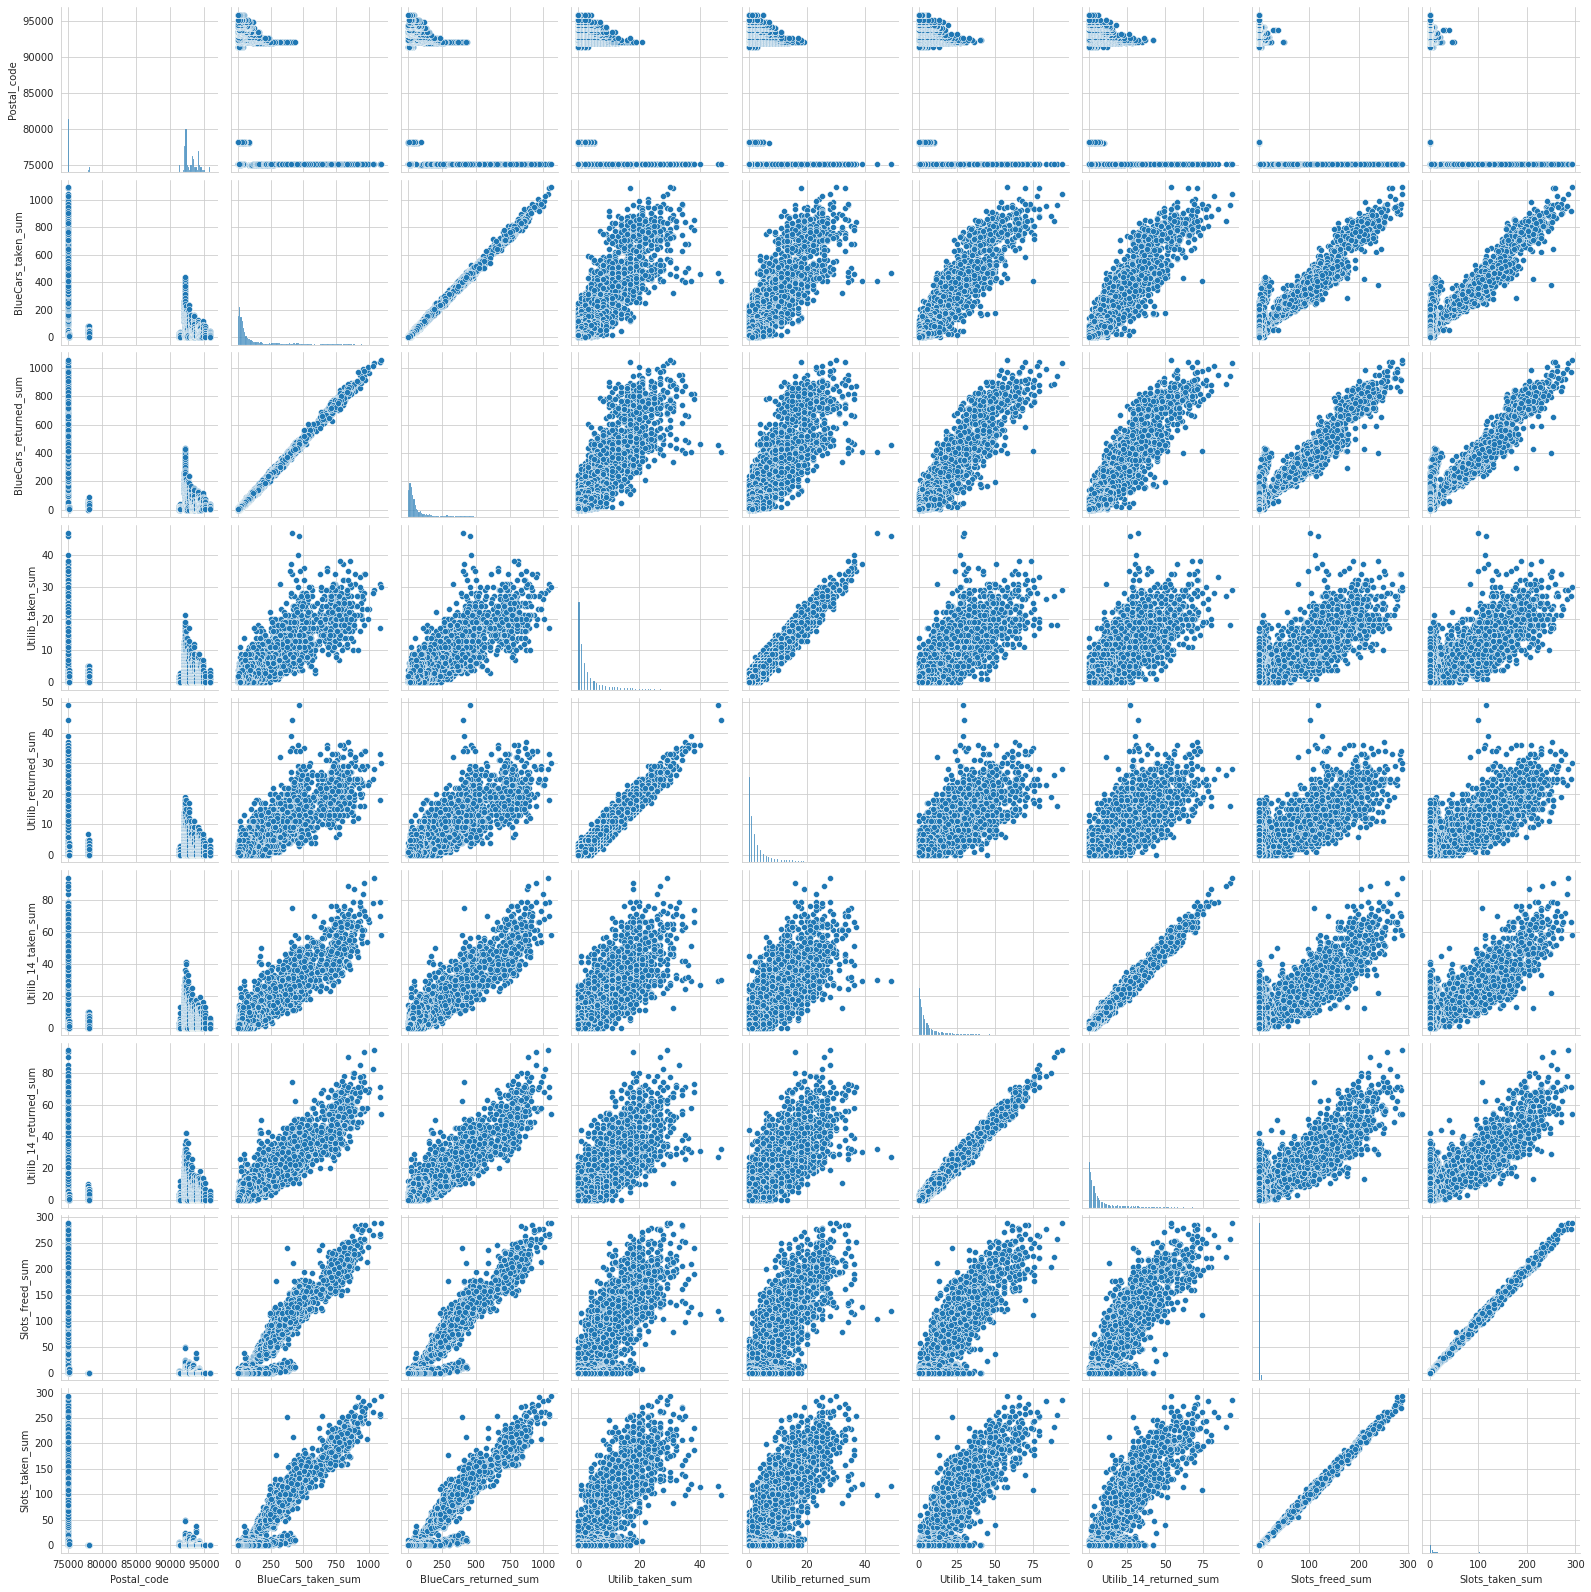

In [244]:
sns.pairplot(autolib_daily)

In [245]:
## check correlation
#

autolib_daily['BlueCars_returned_sum'].corr(autolib_daily['BlueCars_taken_sum'])

0.9987802776217566

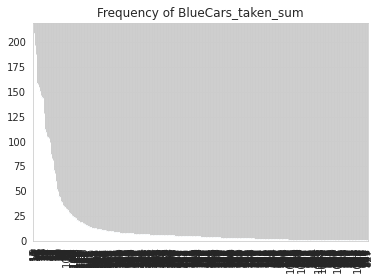

In [246]:
# Bivariate...we use pair plot

# sns.pairplot(autolib_daily_hist)
autolib_daily['BlueCars_taken_sum'].value_counts().plot.bar(title='Frequency of BlueCars_taken_sum')



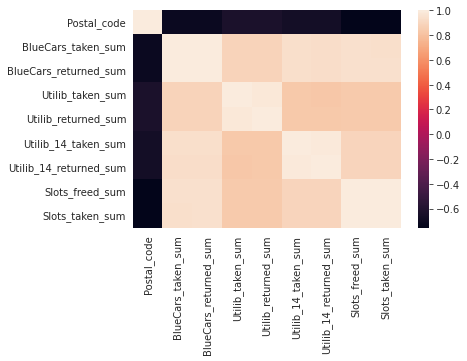

In [247]:
# Plot the correlation using a heatmap.
# ---
sns.heatmap(autolib_daily.corr())


**HYPOTHESIS TESTING**

 defining the null and alternate hypothesis. 
 
 The null hypothesis is the amount of bluecars taken on Tuesday is greater or equal to that taken on Thursday. We will use a significance level of 0.05.

**SAMPLING**

 The sampling method will be stratified random sampling taking samples randomly from two strata, Tuesday and Thursday.

In [248]:
#creating a dataset with only monday and  as ththursdaye dayof week
strata = autolib_daily[autolib_daily['dayOfWeek'].isin(['Tuesday', 'Thursday'])]
strata.head()

,Postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1,75001,1/2/2018,Tuesday,weekday,98,94,1,1,8,8,23,22
3,75001,1/4/2018,Thursday,weekday,104,104,2,2,9,8,25,21
8,75001,1/9/2018,Tuesday,weekday,81,84,1,1,4,4,15,15
10,75001,1/11/2018,Thursday,weekday,125,125,3,4,13,13,22,22
15,75001,1/16/2018,Tuesday,weekday,116,116,1,1,8,8,19,20


In [249]:
#Getting shape of the strata
strata.shape

(4631, 12)

In [250]:
strata['dayOfWeek'].value_counts()

Tuesday     2363
Thursday    2268
Name: dayOfWeek, dtype: int64

There are 4631 values in the stratas. We will get a sample size using about 60% of the population. We find the ideal sample size is 2779. We then randomly select 2779 items from the strata.

In [251]:
# Non stratified sample
non_strat_output = strata.sample(frac=0.6) 

# check the proportion of the non_stratified sample
print(non_strat_output['dayOfWeek'].value_counts())

Tuesday     1400
Thursday    1379
Name: dayOfWeek, dtype: int64


In [252]:
# Stratified sample
strat_output = strata.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.6))

# proportion of the non_stratified sample
print(strat_output['dayOfWeek'].value_counts())

# Check the stratified output
strat_output

Tuesday     1418
Thursday    1361
Name: dayOfWeek, dtype: int64


,Postal_code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1013,75007,3/22/2018,Thursday,weekday,285,284,8,9,14,14,93,96
680,75005,3/1/2018,Thursday,weekday,245,240,8,8,19,16,82,82
14312,94220,4/12/2018,Thursday,weekday,37,39,2,2,2,3,0,0
11398,93310,3/8/2018,Thursday,weekday,22,20,0,0,2,2,0,0
3639,78140,2/22/2018,Thursday,weekday,33,34,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5947,92200,1/23/2018,Tuesday,weekday,62,60,0,0,10,9,0,0
12609,93600,4/24/2018,Tuesday,weekday,17,22,1,2,3,1,0,0
12305,93440,5/1/2018,Tuesday,weekday,2,1,0,0,0,0,0,0
15171,94500,1/23/2018,Tuesday,weekday,24,23,1,2,1,2,0,0


In [253]:
#Finding mean of bluecars taken stratified sample
mean_bluecars = round(strat_output['BlueCars_taken_sum'].mean())
mean_bluecars

112

In [254]:
#Finding the mean of bluecars taken in the entire population
round(df['BlueCars_taken_sum'].mean())

116

In [255]:
#The standard deviation of the population
round(df['BlueCars_taken_sum'].std())

170

In [256]:
import math
sd_bluecars = 170/math.sqrt(2779)
sd_bluecars

3.22481383235196

In [257]:
#Finding the z-score
zscore = (116-113)/sd_bluecars
print(zscore)

0.930286260218626


In [258]:
from scipy import stats
from scipy.stats import norm
alpha = 0.05
prob = stats.norm.cdf(zscore)
print(prob)
if(prob <  alpha):
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

0.823888555092027
We fail to reject the null hypothesis


It shows pvalue is greater than significance value thus we reject to fail null hypothesis.